In [141]:
#Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
#LogisticRegressionClassifier

In [142]:
# Load the training data into a DataFrame named df_train_data.
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')

In [143]:
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


In [144]:
df_train_data.columns=['A','B','C','D','E','F','G','H','I','J']
df_train_data.head(1)

,A,B,C,D,E,F,G,H,I,J
0,55,0,81,0,-6,11,25,88,64,4


In [149]:
df_train_data.describe()

,A,B,C,D,E,F,G,H,I,J
count,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000
mean,48.203931,0.537586,85.371793,0.250483,34.613103,2.537931,37.145586,50.838621,13.835862,0.791586
std,12.194727,77.401196,8.885516,17.067864,21.530426,304.553283,13.039081,21.282548,25.511220,0.406188
min,27.000000,-3161.000000,40.000000,-362.000000,-46.000000,-26739.000000,-18.000000,-191.000000,-264.000000,0.000000
25%,38.000000,0.000000,79.000000,0.000000,28.000000,-4.000000,32.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,43.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,6.000000,42.000000,60.000000,14.000000,1.000000
max,123.000000,4501.000000,118.000000,1751.000000,310.000000,15164.000000,73.000000,131.000000,126.000000,1.000000


In [150]:
df_train_data.J.value_counts()

1    11478
0     3022
Name: J, dtype: int64

In [151]:
# Create binary classification problem; rename some class labels.
df_train_data.J=np.where(df_train_data.J==1,1,0)



In [154]:
df_train_data.head()

,A,B,C,D,E,F,G,H,I,J
0,55,0,81,0,-6,11,25,88,64,0
1,56,0,96,0,52,-4,40,44,4,0
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,0
4,55,2,82,0,54,-6,26,28,2,1


In [158]:
# Create a DataFrame of nine features named X, drop column 9.

X=df_train_data.drop(['J'],axis=1)

In [159]:
# Create a DataFrame of labels named y, select only column 9.

y=df_train_data['J']

In [165]:
# Split the data into a training set and a test set.

X_train,x_test,y_train,y_test=train_test_split(X,y)

In [166]:
# Instantiate a logistic regression classifier with an lbfgs solver.

lr=LogisticRegression(solver='lbfgs')

In [167]:
# Fit the classifier to the data.

lr.fit(X_train,y_train)

/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
# Calculate and print the accuracy of the model on the test data.

from sklearn.metrics import accuracy_score
pred=lr.predict(x_test)
print('Accuracy of LR: {:.3f}'.format(accuracy_score(y_test,pred)))
print('Accuracy Score of LR: {:.3f}'.format(lr.score(x_test,y_test)))

Accuracy of LR: 0.932
Accuracy Score of LR: 0.932


In [169]:
# Use the dummy classifier to calculate the accuracy of a purely random chance.

dummy=DummyClassifier()
dummy.fit(X_train,y_train)
dummy.score(x_test,y_test)

0.6711724137931034

In [171]:
# Print the confusion matrix.

from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred)
confusion

array([[ 607,  186],
       [  60, 2772]])

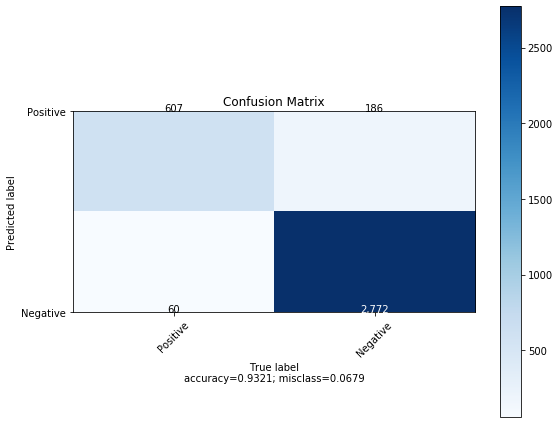

In [174]:
# Use the plot_confusion_matrix() function from above to plot a nicer-looking confusion matrix.

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
       
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

In [178]:
# Print the F₁, Fᵦ, precision, recall, and accuracy scores.

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,fbeta_score
print(' F₁: {} \n Fᵦ: {}\n precision: {}\n recall: {}\n accuracy scores: {}'.format(precision_score(y_test,pred),recall_score(y_test,pred),accuracy_score(y_test,pred),f1_score(y_test,pred),fbeta_score(y_test,pred,0.5)))

 F₁: 0.9371196754563894 
 Fᵦ: 0.9788135593220338
 precision: 0.9321379310344827
 recall: 0.9575129533678756
 accuracy scores: 0.9451718494271685


In [179]:
# Print a classification report
from sklearn.metrics import classification_report
rep=classification_report(y_test,pred)
print(rep)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       793
           1       0.94      0.98      0.96      2832

    accuracy                           0.93      3625
   macro avg       0.92      0.87      0.89      3625
weighted avg       0.93      0.93      0.93      3625



In [180]:
# Calculate AUC 
from sklearn.metrics import roc_auc_score
probs=lr.predict_proba(x_test)[:,1]
auc=roc_auc_score(y_test,probs)
auc

0.970945900214447

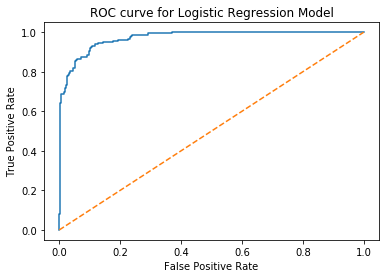

In [181]:
# plot the AUC curve.

from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,probs)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

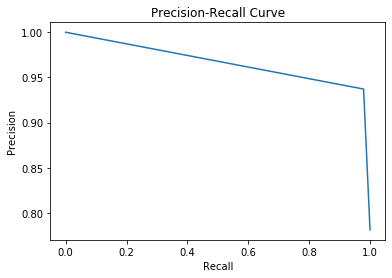

In [182]:
# Plot the precision-recall curve for the model above.

from sklearn.metrics import precision_recall_curve
pres,rec,thr=precision_recall_curve(y_test,pred)
plt.plot(rec,pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Find the best value for C in the logistic regression classifier for avoiding overfitting.
# Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

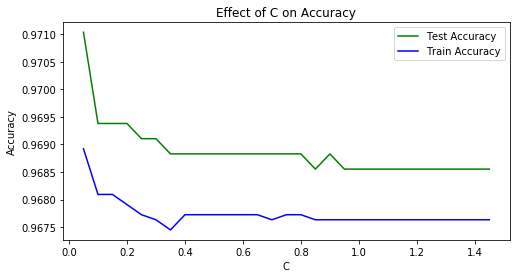

In [183]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000, random_state=2)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(x_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [185]:
best_test_accuracy = max(test_accuracy)

print(f"Best value for C: {c_vals[test_accuracy.index(best_test_accuracy)]}")
print(f"Best test accuracy: {round(best_test_accuracy, 3)}")

Best value for C: 0.05
Best test accuracy: 0.971


In [100]:
# Perform fivefold cross-validation for a logistic regression classifier.
# Print the five accuracy scores and the mean validation score.


In [126]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,X_train,y_train,cv=5)
print(cv_score)

[0.83862069 0.84229885 0.82298851 0.83954023 0.84367816]


In [ ]:
#Your linear classifier is not giving you better accuracy than the dummy classifier. 
#Suppose that the data was not linearly separable. Instantiate and train a KNN model with k = 7. 
#How does the accuracy of the KNN model compare to the logistic regression from above? 
#What does that tell you about the data?

In [135]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred=knn.predict(x_test)
print('Accuracy score of KNN: {}'.format(accuracy_score(y_test,pred)))

Accuracy score of KNN: 0.774896551724138


In [137]:
# instantiate and fit a random forest classifier and calculate the accuracy of that model.

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(x_test)
print('Accuracy score of RF: {}'.format(accuracy_score(y_test,pred)))

Accuracy score of RF: 0.8493793103448276


/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [140]:
2*((9/12)*(9/11))/((9/12)+(9/11))

0.7826086956521738